<center>
<img src="./pict/nltk.png">
<br />
<br />

In [1]:
import nltk # pip install -U nltk
nltk.download("stopwords") # nltk.download() для скачивания всех дополнительных возможностей

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aleksey_ryabykh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<center>
<img src="./pict/text_prerpoc_pipeline.png">
<br />
<br />

In [2]:
with open('./data/ved.txt', 'r') as f:  # считываем текстовый файл
    ved = f.read()

In [3]:
type(ved)

str

In [4]:
ved[:1000]

'Реальный эффективный курс рубля в январе снизился на 3,1%\n\nРеальный эффективный курс рубля к корзине валют государств - основных торговых партнеров России в январе 2015 г. снизился на 3,1% по отношению к декабрю 2014 г.,\xa0говорится в сообщении Центрального банка.Индекс реального курса рубля к доллару понизился на 6,2%, к евро - на 2,1%.Индекс номинального эффективного курса рубля к иностранным валютам снизился на 6,5%, в том числе к евро - на 5,9%, к доллару - на 10,2%.По уточненным данным Банка России, реальный эффективный курс рубля в 2014 г. снизился на 26,7% (по опубликованной ранее предварительной оценке - на 27,2%) против снижения на 2,8% в 2013 г. и укрепления на 5,3% в 2012 г.\n\n\n\n\nДевальвация и контрсанкции обеспечили половину инфляции в 2014 году - Минэкономразвития\n\nВклад девальвации рубля в инфляцию 2014 г. составил 4,2-4,3 процентных пункта, тогда как вклад продовольственного эмбарго был на уровне 1,4 п. п., отмечается в мониторинге Министерства экономического р

In [5]:
paragraphs = [sen for sen in ved.split('\n') if sen]  # разбиваем на параграфы
paragraphs[:5]

['Реальный эффективный курс рубля в январе снизился на 3,1%',
 'Реальный эффективный курс рубля к корзине валют государств - основных торговых партнеров России в январе 2015 г. снизился на 3,1% по отношению к декабрю 2014 г.,\xa0говорится в сообщении Центрального банка.Индекс реального курса рубля к доллару понизился на 6,2%, к евро - на 2,1%.Индекс номинального эффективного курса рубля к иностранным валютам снизился на 6,5%, в том числе к евро - на 5,9%, к доллару - на 10,2%.По уточненным данным Банка России, реальный эффективный курс рубля в 2014 г. снизился на 26,7% (по опубликованной ранее предварительной оценке - на 27,2%) против снижения на 2,8% в 2013 г. и укрепления на 5,3% в 2012 г.',
 'Девальвация и контрсанкции обеспечили половину инфляции в 2014 году - Минэкономразвития',
 'Вклад девальвации рубля в инфляцию 2014 г. составил 4,2-4,3 процентных пункта, тогда как вклад продовольственного эмбарго был на уровне 1,4 п. п., отмечается в мониторинге Министерства экономического раз

In [6]:
len(paragraphs) # количество параграфов

6673

In [7]:
nltk.sent_tokenize(paragraphs[5]) # умное разбиение на предложения

['Основным источником информации об экономической ситуации в России для 81% граждан страны является телевидение, свидетельствуют данные  опроса, проведенного фондом "Общественное мнение" 31 января - 1 февраля среди 1000 респондентов.',
 'При этом россияне в целом пессимистично оценивают экономическую ситуацию в стране: 46% называют ее удовлетворительной, 41% - плохой.',
 'Положительную динамику развития экономики России заметили лишь 7% участников телефонного опроса.Телевидение остается основным источником информации об экономике страны.',
 '81% респондентов именно оттуда узнают последние новости об экономике.',
 'Еще 40% используют для этого интернет, 32% опираются на собственные наблюдения, 25% доверяют газетам, а 23% - информации от родственников и знакомых, 15% слушают радио.50% опрошенных считают центральные телеканалы объективными в оценке экономической ситуации в России.',
 '34% уверены в обратном, 10% затрудняются с ответом, а 3% заявили, что не смотрят центральные каналы.46% с

In [8]:
sentences = [nltk.sent_tokenize(paragraph) for paragraph in paragraphs] # токенизация по предложениям
sentences = [sen for sublist in sentences for sen in sublist]
sentences[:10]

['Реальный эффективный курс рубля в январе снизился на 3,1%',
 'Реальный эффективный курс рубля к корзине валют государств - основных торговых партнеров России в январе 2015 г. снизился на 3,1% по отношению к декабрю 2014 г.,\xa0говорится в сообщении Центрального банка.Индекс реального курса рубля к доллару понизился на 6,2%, к евро - на 2,1%.Индекс номинального эффективного курса рубля к иностранным валютам снизился на 6,5%, в том числе к евро - на 5,9%, к доллару - на 10,2%.По уточненным данным Банка России, реальный эффективный курс рубля в 2014 г. снизился на 26,7% (по опубликованной ранее предварительной оценке - на 27,2%) против снижения на 2,8% в 2013 г. и укрепления на 5,3% в 2012 г.',
 'Девальвация и контрсанкции обеспечили половину инфляции в 2014 году - Минэкономразвития',
 'Вклад девальвации рубля в инфляцию 2014 г. составил 4,2-4,3 процентных пункта, тогда как вклад продовольственного эмбарго был на уровне 1,4 п. п., отмечается в мониторинге Министерства экономического раз

In [9]:
len(sentences) # всего предложений

63667

In [10]:
tokens_sentences = [nltk.word_tokenize(sentence) for sentence in sentences] # токенизация по словам

print(tokens_sentences[:10])

[['Реальный', 'эффективный', 'курс', 'рубля', 'в', 'январе', 'снизился', 'на', '3,1', '%'], ['Реальный', 'эффективный', 'курс', 'рубля', 'к', 'корзине', 'валют', 'государств', '-', 'основных', 'торговых', 'партнеров', 'России', 'в', 'январе', '2015', 'г.', 'снизился', 'на', '3,1', '%', 'по', 'отношению', 'к', 'декабрю', '2014', 'г.', ',', 'говорится', 'в', 'сообщении', 'Центрального', 'банка.Индекс', 'реального', 'курса', 'рубля', 'к', 'доллару', 'понизился', 'на', '6,2', '%', ',', 'к', 'евро', '-', 'на', '2,1', '%', '.Индекс', 'номинального', 'эффективного', 'курса', 'рубля', 'к', 'иностранным', 'валютам', 'снизился', 'на', '6,5', '%', ',', 'в', 'том', 'числе', 'к', 'евро', '-', 'на', '5,9', '%', ',', 'к', 'доллару', '-', 'на', '10,2', '%', '.По', 'уточненным', 'данным', 'Банка', 'России', ',', 'реальный', 'эффективный', 'курс', 'рубля', 'в', '2014', 'г.', 'снизился', 'на', '26,7', '%', '(', 'по', 'опубликованной', 'ранее', 'предварительной', 'оценке', '-', 'на', '27,2', '%', ')', 'пр

In [11]:
tokens_sentences[10] # пример токенизированного предложения

['Положительную',
 'динамику',
 'развития',
 'экономики',
 'России',
 'заметили',
 'лишь',
 '7',
 '%',
 'участников',
 'телефонного',
 'опроса.Телевидение',
 'остается',
 'основным',
 'источником',
 'информации',
 'об',
 'экономике',
 'страны',
 '.']

In [12]:
# приведение к нижнему регистру

tokens_sentences = [[token.lower() for token in token_sentence] for token_sentence in tokens_sentences]

print(tokens_sentences[:10])

[['реальный', 'эффективный', 'курс', 'рубля', 'в', 'январе', 'снизился', 'на', '3,1', '%'], ['реальный', 'эффективный', 'курс', 'рубля', 'к', 'корзине', 'валют', 'государств', '-', 'основных', 'торговых', 'партнеров', 'россии', 'в', 'январе', '2015', 'г.', 'снизился', 'на', '3,1', '%', 'по', 'отношению', 'к', 'декабрю', '2014', 'г.', ',', 'говорится', 'в', 'сообщении', 'центрального', 'банка.индекс', 'реального', 'курса', 'рубля', 'к', 'доллару', 'понизился', 'на', '6,2', '%', ',', 'к', 'евро', '-', 'на', '2,1', '%', '.индекс', 'номинального', 'эффективного', 'курса', 'рубля', 'к', 'иностранным', 'валютам', 'снизился', 'на', '6,5', '%', ',', 'в', 'том', 'числе', 'к', 'евро', '-', 'на', '5,9', '%', ',', 'к', 'доллару', '-', 'на', '10,2', '%', '.по', 'уточненным', 'данным', 'банка', 'россии', ',', 'реальный', 'эффективный', 'курс', 'рубля', 'в', '2014', 'г.', 'снизился', 'на', '26,7', '%', '(', 'по', 'опубликованной', 'ранее', 'предварительной', 'оценке', '-', 'на', '27,2', '%', ')', 'пр

In [13]:
tokens_sentences[10]

['положительную',
 'динамику',
 'развития',
 'экономики',
 'россии',
 'заметили',
 'лишь',
 '7',
 '%',
 'участников',
 'телефонного',
 'опроса.телевидение',
 'остается',
 'основным',
 'источником',
 'информации',
 'об',
 'экономике',
 'страны',
 '.']

In [14]:
from string import punctuation

punctuation = punctuation + '»' + '«'
punctuation # стандартные пунктуационные символы

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~»«'

In [15]:
tokens_sentences = [[token for token in token_sentence if token not in punctuation] 
                    for token_sentence in tokens_sentences] # удаление знаков пунктуации
print(tokens_sentences[:10])

[['реальный', 'эффективный', 'курс', 'рубля', 'в', 'январе', 'снизился', 'на', '3,1'], ['реальный', 'эффективный', 'курс', 'рубля', 'к', 'корзине', 'валют', 'государств', 'основных', 'торговых', 'партнеров', 'россии', 'в', 'январе', '2015', 'г.', 'снизился', 'на', '3,1', 'по', 'отношению', 'к', 'декабрю', '2014', 'г.', 'говорится', 'в', 'сообщении', 'центрального', 'банка.индекс', 'реального', 'курса', 'рубля', 'к', 'доллару', 'понизился', 'на', '6,2', 'к', 'евро', 'на', '2,1', '.индекс', 'номинального', 'эффективного', 'курса', 'рубля', 'к', 'иностранным', 'валютам', 'снизился', 'на', '6,5', 'в', 'том', 'числе', 'к', 'евро', 'на', '5,9', 'к', 'доллару', 'на', '10,2', '.по', 'уточненным', 'данным', 'банка', 'россии', 'реальный', 'эффективный', 'курс', 'рубля', 'в', '2014', 'г.', 'снизился', 'на', '26,7', 'по', 'опубликованной', 'ранее', 'предварительной', 'оценке', 'на', '27,2', 'против', 'снижения', 'на', '2,8', 'в', '2013', 'г.', 'и', 'укрепления', 'на', '5,3', 'в', '2012', 'г'], ['д

In [16]:
tokens_sentences[10]

['положительную',
 'динамику',
 'развития',
 'экономики',
 'россии',
 'заметили',
 'лишь',
 '7',
 'участников',
 'телефонного',
 'опроса.телевидение',
 'остается',
 'основным',
 'источником',
 'информации',
 'об',
 'экономике',
 'страны']

In [17]:
# удаление оставшихся токенов, которые не являются буквенными

tokens_sentences = [[token for token in token_sentence if token.isalpha()] 
                    for token_sentence in tokens_sentences]
print(tokens_sentences[:10])

[['реальный', 'эффективный', 'курс', 'рубля', 'в', 'январе', 'снизился', 'на'], ['реальный', 'эффективный', 'курс', 'рубля', 'к', 'корзине', 'валют', 'государств', 'основных', 'торговых', 'партнеров', 'россии', 'в', 'январе', 'снизился', 'на', 'по', 'отношению', 'к', 'декабрю', 'говорится', 'в', 'сообщении', 'центрального', 'реального', 'курса', 'рубля', 'к', 'доллару', 'понизился', 'на', 'к', 'евро', 'на', 'номинального', 'эффективного', 'курса', 'рубля', 'к', 'иностранным', 'валютам', 'снизился', 'на', 'в', 'том', 'числе', 'к', 'евро', 'на', 'к', 'доллару', 'на', 'уточненным', 'данным', 'банка', 'россии', 'реальный', 'эффективный', 'курс', 'рубля', 'в', 'снизился', 'на', 'по', 'опубликованной', 'ранее', 'предварительной', 'оценке', 'на', 'против', 'снижения', 'на', 'в', 'и', 'укрепления', 'на', 'в', 'г'], ['девальвация', 'и', 'контрсанкции', 'обеспечили', 'половину', 'инфляции', 'в', 'году', 'минэкономразвития'], ['вклад', 'девальвации', 'рубля', 'в', 'инфляцию', 'составил', 'процент

In [18]:
from nltk.corpus import stopwords

stop_words = stopwords.words('russian')
print(stop_words)

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [19]:
stop_words += ['который', 'это']

In [20]:
# удаление стоп слов русского языка
tokens_sentences = [[token for token in token_sentence if token not in stop_words] 
                    for token_sentence in tokens_sentences]
print(tokens_sentences[:10])

[['реальный', 'эффективный', 'курс', 'рубля', 'январе', 'снизился'], ['реальный', 'эффективный', 'курс', 'рубля', 'корзине', 'валют', 'государств', 'основных', 'торговых', 'партнеров', 'россии', 'январе', 'снизился', 'отношению', 'декабрю', 'говорится', 'сообщении', 'центрального', 'реального', 'курса', 'рубля', 'доллару', 'понизился', 'евро', 'номинального', 'эффективного', 'курса', 'рубля', 'иностранным', 'валютам', 'снизился', 'числе', 'евро', 'доллару', 'уточненным', 'данным', 'банка', 'россии', 'реальный', 'эффективный', 'курс', 'рубля', 'снизился', 'опубликованной', 'ранее', 'предварительной', 'оценке', 'против', 'снижения', 'укрепления', 'г'], ['девальвация', 'контрсанкции', 'обеспечили', 'половину', 'инфляции', 'году', 'минэкономразвития'], ['вклад', 'девальвации', 'рубля', 'инфляцию', 'составил', 'процентных', 'пункта', 'вклад', 'продовольственного', 'эмбарго', 'уровне', 'отмечается', 'мониторинге', 'министерства', 'экономического', 'развития'], ['результате', 'вклад', 'деваль

In [21]:
tokens_sentences[10]

['положительную',
 'динамику',
 'развития',
 'экономики',
 'россии',
 'заметили',
 'лишь',
 'участников',
 'телефонного',
 'остается',
 'основным',
 'источником',
 'информации',
 'экономике',
 'страны']

In [22]:
from nltk.stem.snowball import SnowballStemmer ## долго

porter = SnowballStemmer(language='russian') # стэммер
tokens_stemming = [[porter.stem(token) for token in token_sentence] for token_sentence in tokens_sentences]

# стэмминг
print(tokens_stemming[:10])

[['реальн', 'эффективн', 'курс', 'рубл', 'январ', 'сниз'], ['реальн', 'эффективн', 'курс', 'рубл', 'корзин', 'валют', 'государств', 'основн', 'торгов', 'партнер', 'росс', 'январ', 'сниз', 'отношен', 'декабр', 'говор', 'сообщен', 'центральн', 'реальн', 'курс', 'рубл', 'доллар', 'пониз', 'евр', 'номинальн', 'эффективн', 'курс', 'рубл', 'иностра', 'валют', 'сниз', 'числ', 'евр', 'доллар', 'уточнен', 'дан', 'банк', 'росс', 'реальн', 'эффективн', 'курс', 'рубл', 'сниз', 'опубликова', 'ран', 'предварительн', 'оценк', 'прот', 'снижен', 'укреплен', 'г'], ['девальвац', 'контрсанкц', 'обеспеч', 'половин', 'инфляц', 'год', 'минэкономразвит'], ['вклад', 'девальвац', 'рубл', 'инфляц', 'состав', 'процентн', 'пункт', 'вклад', 'продовольствен', 'эмбарг', 'уровн', 'отмеча', 'мониторинг', 'министерств', 'экономическ', 'развит'], ['результат', 'вклад', 'девальвац', 'рубл', 'инфляц', 'втро', 'превыс', 'вклад', 'продовольствен', 'эмбарг', 'принят', 'контрсанкц', 'привод', 'сво', 'оценк', 'образ', 'фактор',

In [23]:
tokens_stemming[10]

['положительн',
 'динамик',
 'развит',
 'экономик',
 'росс',
 'замет',
 'лиш',
 'участник',
 'телефон',
 'оста',
 'основн',
 'источник',
 'информац',
 'экономик',
 'стран']

In [24]:
from pymystem3 import Mystem # pip install pymystem3, ## долго

mystem = Mystem() # лемматизатор

# приведение слова к его канонической форме - лемме
tokens_sentences = [[mystem.lemmatize(token)[0] for token in token_sentence] 
                    for token_sentence in tokens_sentences]
print(tokens_sentences[:10])

[['реальный', 'эффективный', 'курс', 'рубль', 'январь', 'снижаться'], ['реальный', 'эффективный', 'курс', 'рубль', 'корзина', 'валюта', 'государство', 'основной', 'торговый', 'партнер', 'россия', 'январь', 'снижаться', 'отношение', 'декабрь', 'говориться', 'сообщение', 'центральный', 'реальный', 'курс', 'рубль', 'доллар', 'понижаться', 'евро', 'номинальный', 'эффективный', 'курс', 'рубль', 'иностранный', 'валюта', 'снижаться', 'число', 'евро', 'доллар', 'уточнять', 'данный', 'банка', 'россия', 'реальный', 'эффективный', 'курс', 'рубль', 'снижаться', 'опубликовывать', 'ранее', 'предварительный', 'оценка', 'против', 'снижение', 'укрепление', 'г'], ['девальвация', 'контрсанкция', 'обеспечивать', 'половина', 'инфляция', 'год', 'минэкономразвития'], ['вклад', 'девальвация', 'рубль', 'инфляция', 'составлять', 'процентный', 'пункт', 'вклад', 'продовольственный', 'эмбарго', 'уровень', 'отмечаться', 'мониторинг', 'министерство', 'экономический', 'развитие'], ['результат', 'вклад', 'девальвация'

In [25]:
tokens_sentences[10]

['положительный',
 'динамика',
 'развитие',
 'экономика',
 'россия',
 'замечать',
 'лишь',
 'участник',
 'телефонный',
 'оставаться',
 'основной',
 'источник',
 'информация',
 'экономика',
 'страна']

In [26]:
from nltk.stem import WordNetLemmatizer # https://en.wikipedia.org/wiki/WordNet

nltk_lemmatizer = WordNetLemmatizer() 

# part of speach ADJ, ADJ_SAT, ADV, NOUN, VERB = "a", "s", "r", "n", "v
nltk_lemmatizer.lemmatize("better", pos = "a") 

'good'

In [27]:
# повторное удаление стоп слов русского языка
tokens_sentences = [[token for token in token_sentence if token not in stop_words] 
                    for token_sentence in tokens_sentences]

print(tokens_sentences[:10])

[['реальный', 'эффективный', 'курс', 'рубль', 'январь', 'снижаться'], ['реальный', 'эффективный', 'курс', 'рубль', 'корзина', 'валюта', 'государство', 'основной', 'торговый', 'партнер', 'россия', 'январь', 'снижаться', 'отношение', 'декабрь', 'говориться', 'сообщение', 'центральный', 'реальный', 'курс', 'рубль', 'доллар', 'понижаться', 'евро', 'номинальный', 'эффективный', 'курс', 'рубль', 'иностранный', 'валюта', 'снижаться', 'число', 'евро', 'доллар', 'уточнять', 'данный', 'банка', 'россия', 'реальный', 'эффективный', 'курс', 'рубль', 'снижаться', 'опубликовывать', 'ранее', 'предварительный', 'оценка', 'против', 'снижение', 'укрепление', 'г'], ['девальвация', 'контрсанкция', 'обеспечивать', 'половина', 'инфляция', 'год', 'минэкономразвития'], ['вклад', 'девальвация', 'рубль', 'инфляция', 'составлять', 'процентный', 'пункт', 'вклад', 'продовольственный', 'эмбарго', 'уровень', 'отмечаться', 'мониторинг', 'министерство', 'экономический', 'развитие'], ['результат', 'вклад', 'девальвация'

In [28]:
tokens = [token for sublist in tokens_sentences for token in sublist]

len(tokens) # итоговое количество токенов, размер нашего словаря - len(set(tokens))

960816

In [29]:
from collections import Counter

tokens = [token for sublist in tokens_sentences for token in sublist]
freq_tokens = Counter(tokens)

freq_tokens.most_common(10)

[('год', 7658),
 ('компания', 5732),
 ('рост', 5656),
 ('россия', 5349),
 ('млрд', 5035),
 ('экономика', 4701),
 ('говорить', 4594),
 ('страна', 4307),
 ('рынок', 3584),
 ('правительство', 3351)]

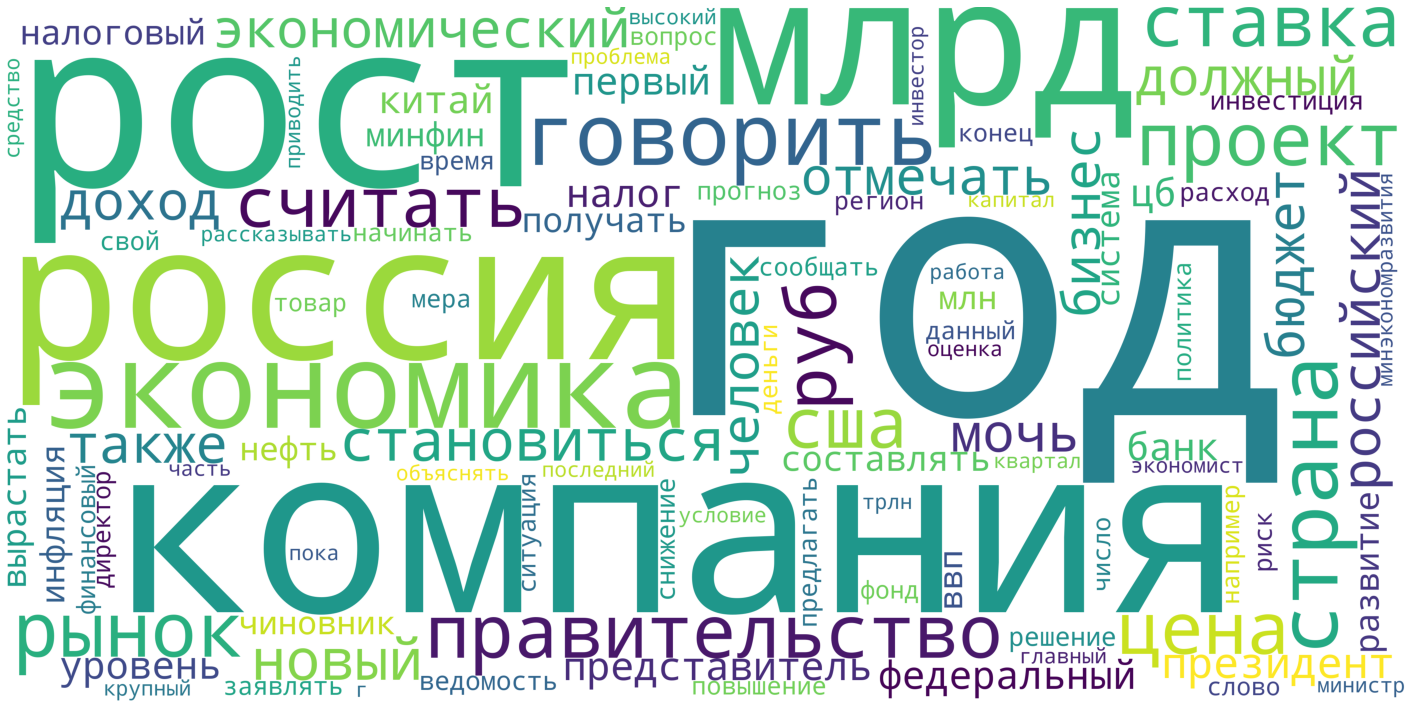

In [30]:
from wordcloud import WordCloud # pip install wordcloud
import matplotlib.pyplot as plt
%matplotlib inline

wc = WordCloud(width=4000, height=2000, max_words=100, 
               background_color='white', mask=None).generate_from_frequencies(freq_tokens)

plt.figure(figsize=(20, 10))
plt.imshow(wc)
plt.tight_layout(pad=0)
plt.axis("off")
plt.show()

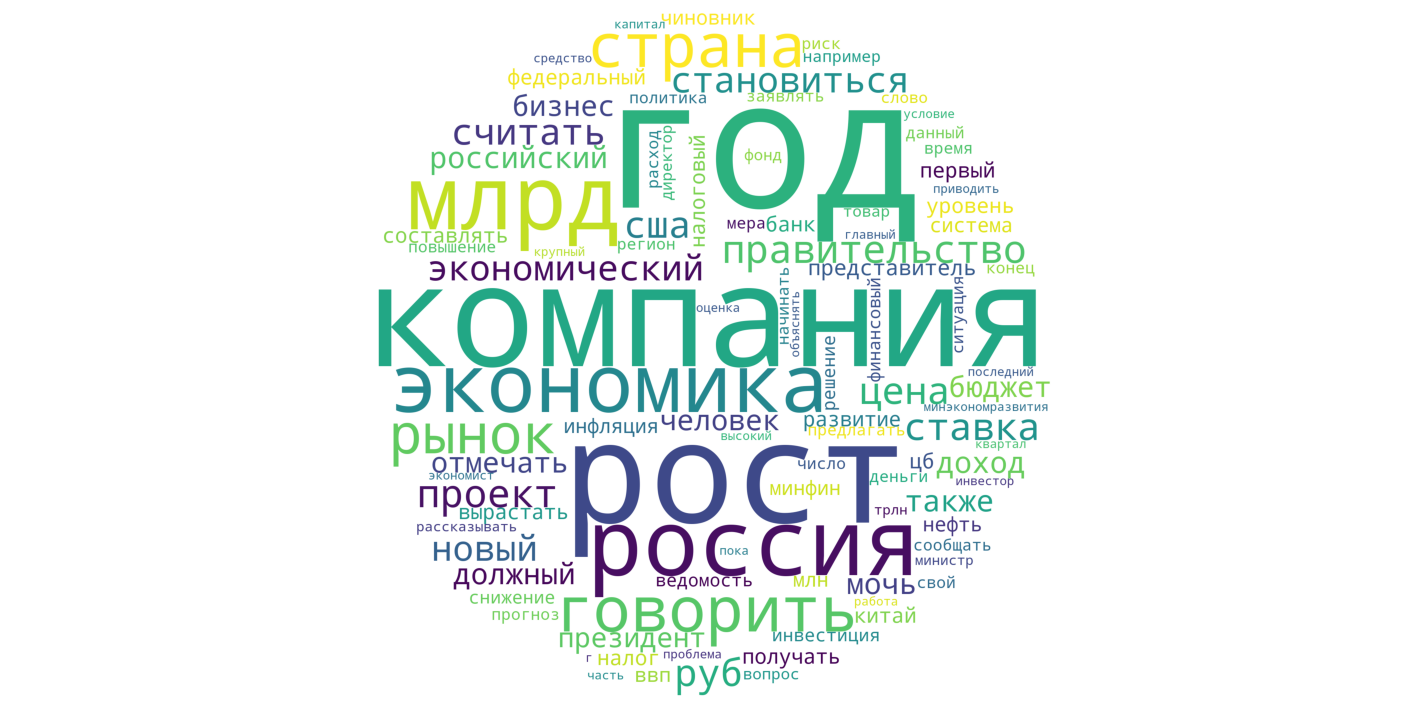

In [31]:
# можем использовать и (или создавать) различные маски

import numpy as np

def create_circular_mask(h, w, center=None, radius=None):

    if center is None: 
        center = (int(w/2), int(h/2))
    if radius is None: 
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0]) ** 2 + (Y-center[1]) **2)

    mask = dist_from_center <= radius
    mask = ~mask
    
    return mask

mask = create_circular_mask(2000, 4000)
mask = 255 * mask.astype(int)

wc = WordCloud(width=4000, height=2000, max_words=100, 
               background_color='white', mask=mask).generate_from_frequencies(freq_tokens)

plt.figure(figsize=(20, 10))
plt.imshow(wc)
plt.tight_layout(pad=0)
plt.axis("off")
plt.show()

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

sk_corpus = [' '.join(token for token in sentence) for sentence in tokens_sentences]

vectorizer = CountVectorizer(vocabulary=list(freq_tokens.keys()))
X_bow = vectorizer.fit_transform(sk_corpus)

In [33]:
X_bow.shape # (len(sentences), len(set(tokens)))

(63667, 23864)

In [34]:
X_bow.toarray() # матрица количества каждого слова вхождений

array([[1, 1, 1, ..., 0, 0, 0],
       [3, 3, 4, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]])

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(vocabulary=list(freq_tokens.keys())) # tf-idf преобразование
X_tfidf = vectorizer.fit_transform(sk_corpus)

In [36]:
X_tfidf.toarray() # tf-idf матрица

array([[0.40657273, 0.49644118, 0.39562481, ..., 0.        , 0.        ,
        0.        ],
       [0.29399001, 0.35897329, 0.38143153, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.39768407],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [37]:
import pandas as pd

idf = pd.DataFrame(vectorizer.get_feature_names(), columns=['token'])
idf['idf'] = vectorizer.idf_

In [38]:
idf.sort_values('idf').head()

,token,idf
40,год,3.235437
477,компания,3.540053
12,россия,3.563835
549,рост,3.581738
134,говорить,3.665057


In [39]:
idf.sort_values('idf').tail()

,token,idf
1781,п,12.061437
14966,k,12.061437
137,s,12.061437
2788,т,12.061437
5764,л,12.061437


<AxesSubplot:>

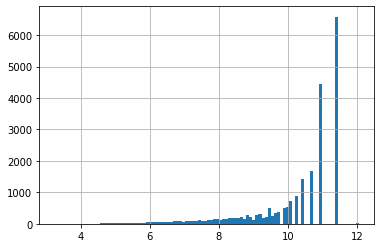

In [40]:
idf.idf.hist(bins=100)

In [41]:
idf_tokens = idf[(idf.idf > 4.5) & (idf.idf < 9)].token.tolist()
freq_tokens_idf = {key: freq_tokens[key] for key in idf_tokens}

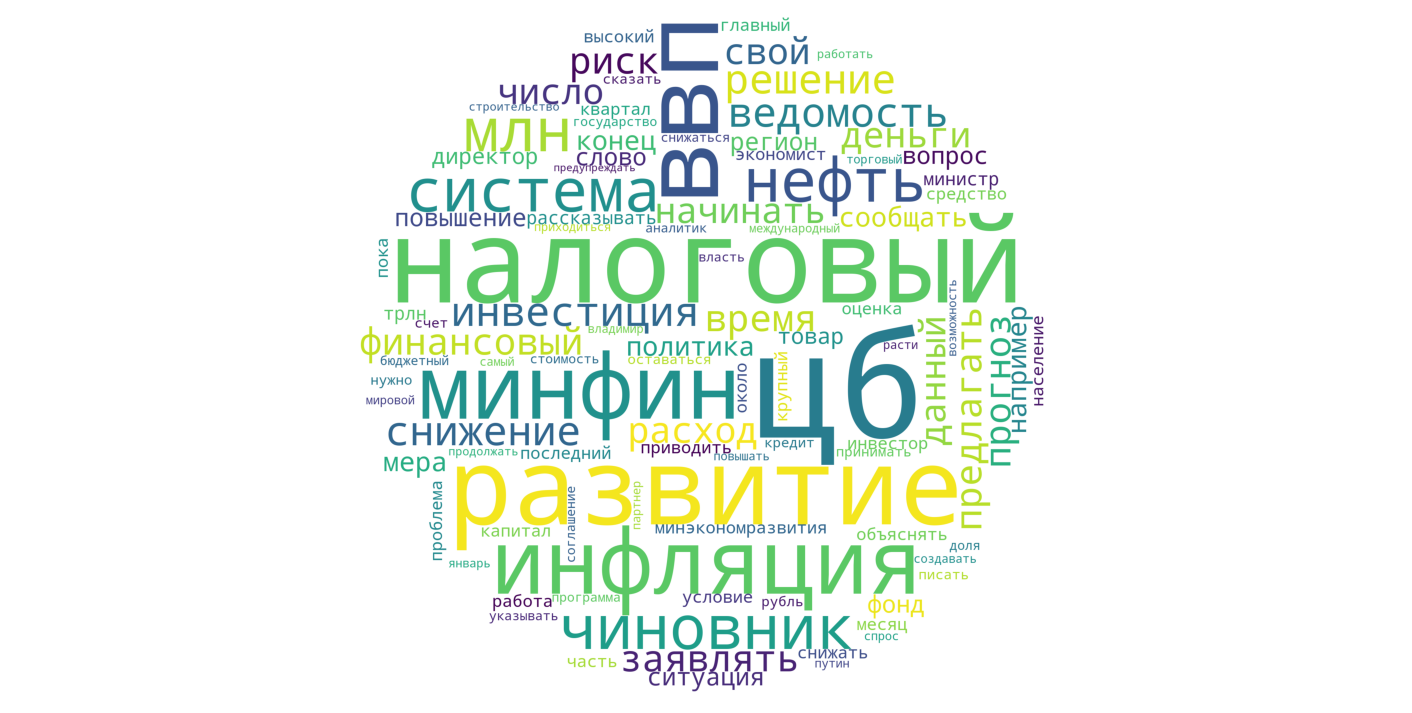

In [42]:
wc = WordCloud(width=4000, height=2000, max_words=100, 
               background_color='white', mask=mask).generate_from_frequencies(freq_tokens_idf)

plt.figure(figsize=(20, 10))
plt.imshow(wc)
plt.tight_layout(pad=0)
plt.axis("off")
plt.show()

<center>
<img src="./pict/gensim_logo.png">
<br />
<br />

In [43]:
from gensim.corpora.dictionary import Dictionary # pip install --upgrade gensim

gensim_dictionary = Dictionary(tokens_sentences) # словарь

In [44]:
gensim_dictionary[0]

'курс'

In [45]:
gensim_dictionary.id2token[0]

'курс'

In [46]:
gensim_dictionary.token2id['курс']

0

Фразы (n-gram) в Gensim

In [47]:
from gensim.models.phrases import Phrases

bigram = Phrases(tokens_sentences, min_count=100, threshold=100)
bigram_tokens = bigram[tokens_sentences]

trigram = Phrases(bigram_tokens, min_count=100, threshold=50)
trigram_tokens = trigram[bigram_tokens]

In [48]:
trigram_tokens[0]

['реальный', 'эффективный', 'курс_рубль', 'январь', 'снижаться']

In [49]:
gensim_dictionary = Dictionary(trigram_tokens)

Фильтрация в Gensim

In [50]:
gensim_dictionary.filter_extremes(no_below=100, no_above=0.2, keep_n=100000) # аналог фильтрации по idf

In [ ]:
gensim_dictionary.filter_n_most_frequent() # удаляет только топ по частоте

In [ ]:
gensim_dictionary.filter_tokens(bad_ids=None, good_ids=None) # оставляет/удаляет только выбранные token'ы

In [51]:
bow = [gensim_dictionary.doc2bow(sentence) for sentence in tokens_sentences]

print(bow[:10]) # представление мешок слов (bag of words)

[[(1, 1), (2, 1), (3, 1), (4, 1), (44, 1), (597, 1)], [(1, 3), (2, 3), (3, 3), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (44, 4), (597, 4)], [(32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1)], [(33, 1), (34, 1), (38, 2), (39, 1), (40, 1), (41, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (900, 1)], [(6, 1), (19, 1), (33, 2), (34, 2), (36, 1), (37, 1), (38, 3), (44, 1), (45, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1)], [(59, 1), (60, 1), (61, 1)], [(39, 1), (59, 1), (60, 1), (61, 1), (62, 1)], [(30, 1), (47, 1), (63, 1), (64, 1)], [(4, 1), (17, 1), (24, 1), (47, 1), (58, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1)], [(47, 1), (63, 1), (6

In [ ]:
from gensim.models.ldamodel import LdaModel

lda = LdaModel(bow, num_topics=5, random_state=0) # пример тематического моделирования

In [ ]:
import pyLDAvis
import pyLDAvis.gensim

vis = pyLDAvis.gensim.prepare(topic_model=lda, corpus=bow, dictionary=gensim_dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

<center>
<img src="./pict/natasha_logo.png">
<br />
<br />

__Natasha__ - библиотека NLP специализированная для русского языка 

In [52]:
import natasha
from natasha import (Segmenter, MorphVocab, NewsEmbedding, 
                    NewsMorphTagger, NewsSyntaxParser, NewsNERTagger, NamesExtractor, Doc)


Распознаёт три типа именнованных сущностей: __PER__ - персоны, __OGR__ - организации, __LOC__ - локации

In [53]:
raw_text = ' '.join(sentences[:10])
doc = Doc(raw_text)

In [54]:
raw_text

'Реальный эффективный курс рубля в январе снизился на 3,1% Реальный эффективный курс рубля к корзине валют государств - основных торговых партнеров России в январе 2015 г. снизился на 3,1% по отношению к декабрю 2014 г.,\xa0говорится в сообщении Центрального банка.Индекс реального курса рубля к доллару понизился на 6,2%, к евро - на 2,1%.Индекс номинального эффективного курса рубля к иностранным валютам снизился на 6,5%, в том числе к евро - на 5,9%, к доллару - на 10,2%.По уточненным данным Банка России, реальный эффективный курс рубля в 2014 г. снизился на 26,7% (по опубликованной ранее предварительной оценке - на 27,2%) против снижения на 2,8% в 2013 г. и укрепления на 5,3% в 2012 г. Девальвация и контрсанкции обеспечили половину инфляции в 2014 году - Минэкономразвития Вклад девальвации рубля в инфляцию 2014 г. составил 4,2-4,3 процентных пункта, тогда как вклад продовольственного эмбарго был на уровне 1,4 п. п., отмечается в мониторинге Министерства экономического развития. "В рез

In [55]:
doc

Doc(text='Реальный эффективный курс рубля в январе снизился...)

Поиск именованных сущностей:

In [56]:
segmenter = Segmenter() 
emb = NewsEmbedding()
ner_tagger = NewsNERTagger(emb)

In [57]:
doc.segment(segmenter) 
doc.tag_ner(ner_tagger)
doc.ner.print() 

Реальный эффективный курс рубля в январе снизился на 3,1% Реальный 
эффективный курс рубля к корзине валют государств - основных торговых 
партнеров России в январе 2015 г. снизился на 3,1% по отношению к 
          LOC───                                                  
декабрю 2014 г., говорится в сообщении Центрального банка.Индекс 
                                       ORG───────────────        
реального курса рубля к доллару понизился на 6,2%, к евро - на 
2,1%.Индекс номинального эффективного курса рубля к иностранным 
валютам снизился на 6,5%, в том числе к евро - на 5,9%, к доллару - на
 10,2%.По уточненным данным Банка России, реальный эффективный курс 
                            ORG─────────                            
рубля в 2014 г. снизился на 26,7% (по опубликованной ранее 
предварительной оценке - на 27,2%) против снижения на 2,8% в 2013 г. и
 укрепления на 5,3% в 2012 г. Девальвация и контрсанкции обеспечили 
половину инфляции в 2014 году - Минэкономразвития Вклад д

In [58]:
doc.sents[:5]

[DocSent(stop=989, text='Реальный эффективный курс рубля в январе снизился..., tokens=[...], spans=[...]),
 DocSent(start=990, stop=1378, text='"В результате вклад девальвации рубля в инфляцию ..., tokens=[...]),
 DocSent(start=1379, stop=1463, text='Продовольственные товары, попавшие под контрсанкц..., tokens=[...]),
 DocSent(start=1464, stop=1574, text='Продовольственные товары, не попавшие под контрса..., tokens=[...]),
 DocSent(start=1575, stop=1878, text='81% россиян узнают об экономической ситуации из ц..., tokens=[...], spans=[...])]

In [59]:
doc.tokens[:10]

[DocToken(stop=8, text='Реальный'),
 DocToken(start=9, stop=20, text='эффективный'),
 DocToken(start=21, stop=25, text='курс'),
 DocToken(start=26, stop=31, text='рубля'),
 DocToken(start=32, stop=33, text='в'),
 DocToken(start=34, stop=40, text='январе'),
 DocToken(start=41, stop=49, text='снизился'),
 DocToken(start=50, stop=52, text='на'),
 DocToken(start=53, stop=56, text='3,1'),
 DocToken(start=56, stop=57, text='%')]

In [60]:
doc.spans

[DocSpan(start=147, stop=153, type='LOC', text='России', tokens=[...]),
 DocSpan(start=242, stop=260, type='ORG', text='Центрального банка', tokens=[...]),
 DocSpan(start=493, stop=505, type='ORG', text='Банка России', tokens=[...]),
 DocSpan(start=762, stop=779, type='ORG', text='Минэкономразвития', tokens=[...]),
 DocSpan(start=952, stop=988, type='ORG', text='Министерства экономического развития', tokens=[...]),
 DocSpan(start=1706, stop=1712, type='LOC', text='России', tokens=[...]),
 DocSpan(start=1811, stop=1830, type='ORG', text='Общественное мнение', tokens=[...])]

In [61]:
class color:
    
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'
    
raw_text = ' '.join(sentences[:200])
doc = Doc(raw_text)

segmenter = Segmenter() 
emb = NewsEmbedding()
ner_tagger = NewsNERTagger(emb)

doc.segment(segmenter)  ## долго
doc.tag_ner(ner_tagger)

orgs = [span.text for span in doc.spans if span.type == 'ORG']
orgs = list(set(orgs))
print(color.BOLD + color.GREEN + 'Организации:' + color.END, ', '.join(orgs))
print()

locs = [span.text for span in doc.spans if span.type == 'LOC']
locs = list(set(locs))
print(color.BOLD + color.BLUE + 'Локации:' + color.END, ', '.join(locs))
print()

pers = [span.text for span in doc.spans if span.type == 'PER']
pers = list(set(pers))
print(color.BOLD + color.RED + 'Персоны:' + color.END, ', '.join(pers))
print()

Организации: Международный валютный фонд (МВФ), НБУ, Национальный банк, Reuters, Кабмина, Уточненный, РЭУ, МЭСИ, РИА Новости, Горьковского государственного университета, Центробанк, Интерфаксу, Baker Hughes, G7, Международное энергетическое агентство, Standard & Poor's, Минобрнауки, Московского педагогического государственного университета (МПГУ), Университет Райса, Института общественной политики, Центробанка, МВФ, Госдумы, S&P, Минэкономразвития, Интерфакс, Прайму, НАТО, Прайм, Нацбанк, AFP, Минэкономики, Reuters G7, Goldman Sachs, DrillingInfo, Верховная рада, Таможенного союза, ВТБ, РЭУ им. Плеханова, Центрального банка, Министерство финансов, Общественное мнение, РЭУ имени Г.В. Плеханова, МГГУ, АЭС, Еврогруппы, МПГУ, SWIFT, The Wall Street Journal, Permian, Международным валютным фондом (МВФ), Национальном агентстве, Московского государственного университета экономики, статистики и информатики, Московского гуманитарного государственного университета имени Шолохова, Росстат, Еврогр

Определение частей речи в тексте

In [62]:
segmenter = Segmenter()  
emb = NewsEmbedding() 
morph_tagger = NewsMorphTagger(emb)  

doc.segment(segmenter) 
doc.tag_morph(morph_tagger)

doc.sents[2].morph.print()

   Продовольственные ADJ|Case=Nom|Degree=Pos|Number=Plur
              товары NOUN|Animacy=Inan|Case=Nom|Gender=Masc|Number=Plur
                   , PUNCT
            попавшие VERB|Aspect=Perf|Case=Nom|Number=Plur|Tense=Past|VerbForm=Part|Voice=Act
                 под ADP
        контрсанкции NOUN|Animacy=Inan|Case=Acc|Gender=Fem|Number=Plur
                   , PUNCT
                  за ADP
                2014 ADJ
                   г NOUN|Animacy=Inan|Case=Gen|Gender=Masc|Number=Sing
                   . PUNCT
          подорожали VERB|Aspect=Perf|Mood=Ind|Number=Plur|Tense=Past|VerbForm=Fin|Voice=Act
                  на ADP
                17,9 NUM
                   % SYM
                   . PUNCT


In [63]:
doc.sents[2].morph.tokens[0].pos

'ADJ'

In [64]:
morph = [token.pos for token in doc.tokens]

print(morph[:10])

['ADJ', 'ADJ', 'NOUN', 'NOUN', 'ADP', 'NOUN', 'VERB', 'ADP', 'NUM', 'SYM']


Встроенная лемматизация (под капотом pymorphy)

In [65]:
segmenter = Segmenter()  
morph_vocab = MorphVocab()

In [66]:
for token in doc.tokens:
    token.lemmatize(morph_vocab)

In [67]:
doc.tokens[:10]

[DocToken(stop=8, text='Реальный', pos='ADJ', feats=<Nom,Pos,Masc,Sing>, lemma='реальный'),
 DocToken(start=9, stop=20, text='эффективный', pos='ADJ', feats=<Nom,Pos,Masc,Sing>, lemma='эффективный'),
 DocToken(start=21, stop=25, text='курс', pos='NOUN', feats=<Inan,Nom,Masc,Sing>, lemma='курс'),
 DocToken(start=26, stop=31, text='рубля', pos='NOUN', feats=<Inan,Gen,Masc,Sing>, lemma='рубль'),
 DocToken(start=32, stop=33, text='в', pos='ADP', lemma='в'),
 DocToken(start=34, stop=40, text='январе', pos='NOUN', feats=<Inan,Loc,Masc,Sing>, lemma='январь'),
 DocToken(start=41, stop=49, text='снизился', pos='VERB', feats=<Perf,Masc,Ind,Sing,Past,Fin,Mid>, lemma='снизиться'),
 DocToken(start=50, stop=52, text='на', pos='ADP', lemma='на'),
 DocToken(start=53, stop=56, text='3,1', pos='NUM', lemma='3,1'),
 DocToken(start=56, stop=57, text='%', pos='SYM', lemma='%')]

In [68]:
lemmas = [token.lemma for token in doc.tokens] # список лемм

print(lemmas[:10]) 

['реальный', 'эффективный', 'курс', 'рубль', 'в', 'январь', 'снизиться', 'на', '3,1', '%']


In [69]:
d_lemmas = {token.text: token.lemma for token in doc.tokens[:20]} # словарь из лемм
d_lemmas

{'Реальный': 'реальный',
 'эффективный': 'эффективный',
 'курс': 'курс',
 'рубля': 'рубль',
 'в': 'в',
 'январе': 'январь',
 'снизился': 'снизиться',
 'на': 'на',
 '3,1': '3,1',
 '%': '%',
 'к': 'к',
 'корзине': 'корзина',
 'валют': 'валюта',
 'государств': 'государство',
 '-': '-',
 'основных': 'основный'}

Синтаксический разбор

In [70]:
segmenter = Segmenter() 
emb = NewsEmbedding() 
syntax_parser = NewsSyntaxParser(emb)

doc.segment(segmenter)
doc.parse_syntax(syntax_parser) 
doc.sents[2].syntax.print()

        ┌► Продовольственные amod
┌────►┌─└─ товары            nsubj
│     │ ┌► ,                 punct
│ ┌─┌─└►└─ попавшие          acl
│ │ │   ┌► под               case
│ │ └──►└─ контрсанкции      obl
│ └──────► ,                 punct
│     ┌──► за                case
│     │ ┌► 2014              amod
│   ┌►└─└─ г                 obl
│   │ └──► .                 punct
└─┌─└───── подорожали        
│ │   ┌──► на                case
│ │   │ ┌► 17,9              nummod
│ └──►└─└─ %                 obl
└────────► .                 punct
